In [3]:
#!pip --version
#!pip install --upgrade tensorflow
!conda install tensorflow

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::daal4py==2021.3.0=py39h01d92e1_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::scipy==1.7.1=py39h88652d9_2
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::numba==0.54.1=py39hae1ba45_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::bottleneck==1.3.2=py39he3068b8_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::patsy==0.5.2=py39hecd8cb5_0
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39ha952a84_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_0
  - defaults/osx-64::ipykernel==6.4.1=py39hecd8cb5_1
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::matplotlib-base==3.4.3=py39h0a11d32_0
 

In [5]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4457,2014-06-04 00:00:00,557125.0,4.0,2.75,3370,12447,2.0,0,0,3,3370,0,1991,0,14257 212th Dr NE,Woodinville,WA 98077,USA
1306,2014-05-24 00:00:00,347000.0,4.0,1.50,2670,10026,2.0,0,0,3,2670,0,1996,0,1121 48th Ct SE,Auburn,WA 98092,USA
2225,2014-06-10 00:00:00,375500.0,3.0,1.50,1530,7200,1.0,0,0,3,1530,0,1975,0,3005 NE 194th St,Lake Forest Park,WA 98155,USA
3538,2014-06-27 00:00:00,641000.0,4.0,2.50,2770,63118,2.0,0,0,3,2770,0,1997,0,6338 284th Way NE,Carnation,WA 98014,USA
1409,2014-05-27 00:00:00,488000.0,3.0,2.50,1590,2550,3.0,0,0,3,1590,0,1985,0,6601-6699 28th Ave NW,Seattle,WA 98117,USA


In [6]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


## Feature Engineering

In [7]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]
# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10 
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]
# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [8]:
# Remove cities where there's 50 house data or less
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [9]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
2091,550000.0,3.0,2.50,2260,4165,2.0,0,0,3,2260,0,Sammamish,16,0,0,0
994,699000.0,4.0,2.50,2650,7945,2.0,0,0,3,2650,0,Seattle,15,0,0,0
3985,300000.0,3.0,1.00,930,5160,1.5,0,0,5,930,0,Seattle,102,1,0,0
1517,700000.0,4.0,3.50,4490,5099,2.0,0,0,3,3390,1100,Snoqualmie,15,0,0,0
2266,899900.0,4.0,2.50,2580,3909,2.0,0,0,3,2580,0,Kirkland,8,1,0,0
465,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,Maple Valley,18,0,0,0
1006,250000.0,4.0,1.50,2500,6300,1.0,0,0,4,1500,1000,Kent,60,1,0,1
860,475000.0,2.0,1.00,1490,3825,1.0,0,0,3,860,630,Seattle,92,0,0,0
854,352500.0,3.0,2.25,1410,14110,1.0,0,2,3,1170,240,Snoqualmie,34,1,0,1
2859,186000.0,3.0,2.00,1340,4320,1.0,0,0,3,920,420,Auburn,109,1,0,1


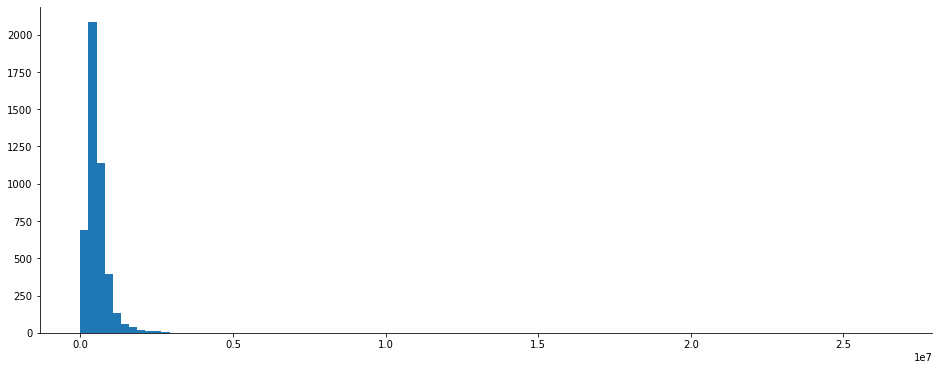

In [10]:
# Visualize price

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.hist(df['price'], bins=100);

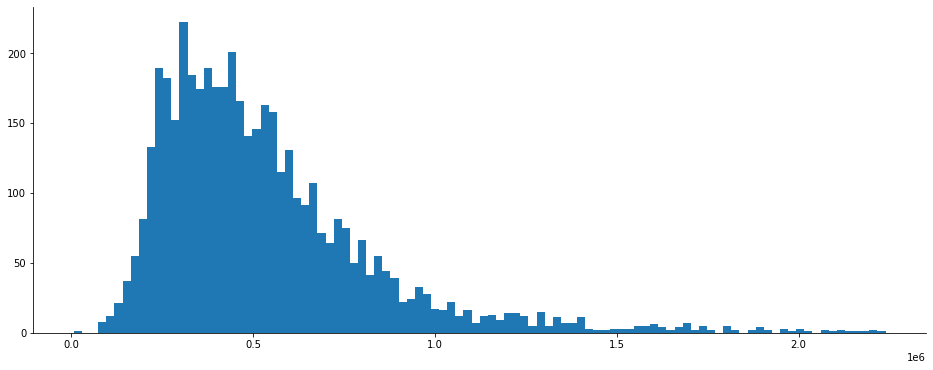

In [11]:
# use Z score(remove data outside of 3 std away) to eliminate outliers (or use IQR)

from scipy import stats
# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))
# Filter out outliers
df = df[df['price_z'] <= 3]
# Remove houses listed for $0
df = df[df['price'] != 0]
# Drop the column
df = df.drop('price_z', axis=1)
# Draw a histogram
plt.hist(df['price'], bins=100);

In [12]:
# look for non numeric data
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
4306,840000.0,4.0,3.50,3840,85728,2.0,0,0,3,3840,0,Rare,23,1,0,1
292,480500.0,4.0,2.50,2180,11200,1.0,0,0,4,2180,0,Woodinville,53,0,0,0
4253,284000.0,3.0,1.50,1500,10018,1.0,0,0,4,1500,0,Renton,64,1,0,1
633,175000.0,2.0,1.00,1170,8925,1.0,0,2,3,1170,0,Des Moines,110,1,0,0
1755,590000.0,4.0,4.25,2360,57514,2.0,0,0,4,2360,0,Federal Way,82,1,0,0


# *NN dont work well with extreame outliers and unscaled data*

In [13]:
# scale and OHE 

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [16]:
X_train

<3613x53 sparse matrix of type '<class 'numpy.float64'>'
	with 33918 stored elements in Compressed Sparse Row format>

In [17]:
# transform sparse matrices to array
X_train = X_train.toarray()
X_test = X_test.toarray()

# *Building the model NN*

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [1]:
# How to track the LOSS of the model:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [4]:
!pip install --upgrade numpy

     |████████████████████████████████| 17.6 MB 861 kB/s eta 0:00:01     |███████████████████████▏        | 12.8 MB 939 kB/s eta 0:00:06
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.


In [5]:
tf.random.set_seed(42)
model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)
model.fit(X_train, y_train, epochs=100)


NameError: name 'tf' is not defined

In [1]:
predictions = model.predict(X_test)
predictions[:5]

NameError: name 'model' is not defined

In [2]:
predictions = np.ravel(predictions)
predictions[:5]

NameError: name 'np' is not defined

In [3]:
rmse(y_test, predictions).numpy()

NameError: name 'rmse' is not defined